# import package and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.datasets import load_iris, load_boston
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder, LabelEncoder
import sklearn.preprocessing as preprocessing
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

In [2]:
#read data
data = pd.read_csv("C:/Users/Rania Yunaningrum/OneDrive/Dokumen/SMT 6/DATMIN/Data Insurance.csv")
print(data.head())
before = data.dtypes

   applicant_id  years_of_insurance_with_us  regular_checkup_lasy_year  \
0          5000                           3                          1   
1          5001                           0                          0   
2          5002                           1                          0   
3          5003                           7                          4   
4          5004                           3                          1   

   adventure_sports Occupation  visited_doctor_last_1_year cholesterol_level  \
0                 1    Salried                           2        125 to 150   
1                 0    Student                           4        150 to 175   
2                 0   Business                           4        200 to 225   
3                 0   Business                           2        175 to 200   
4                 0    Student                           2        150 to 175   

   daily_avg_steps  age  heart_decs_history  ...   smoking_status  \
0    

In [3]:
data = data.astype({"applicant_id":'str', "regular_checkup_lasy_year":'str',
                    "adventure_sports":'str',"heart_decs_history":'str',"other_major_decs_history":'str' })
data.info
after = data.dtypes

print("BEFORE CONVERSION\n", before, "\n")
print("AFTER CONVERSION\n", after, "\n")

BEFORE CONVERSION
 applicant_id                        int64
years_of_insurance_with_us          int64
regular_checkup_lasy_year           int64
adventure_sports                    int64
Occupation                         object
visited_doctor_last_1_year          int64
cholesterol_level                  object
daily_avg_steps                     int64
age                                 int64
heart_decs_history                  int64
other_major_decs_history            int64
Gender                             object
avg_glucose_level                   int64
bmi                               float64
smoking_status                     object
Year_last_admitted                float64
Location                           object
weight                              int64
covered_by_any_other_company       object
Alcohol                            object
exercise                           object
weight_change_in_last_one_year      int64
fat_percentage                      int64
insurance_cost 

# Missing Value Treatment

In [4]:
#deteksi missing value
print('Data Objek\n',data[data.columns[data.dtypes == 'object']].isnull().sum()) #tipe object
print('Data Non Objek\n',data[data.columns[data.dtypes != 'object']].isnull().sum()) #tipe int float

Data Objek
 applicant_id                    0
regular_checkup_lasy_year       0
adventure_sports                0
Occupation                      0
cholesterol_level               0
heart_decs_history              0
other_major_decs_history        0
Gender                          0
smoking_status                  0
Location                        0
covered_by_any_other_company    0
Alcohol                         0
exercise                        0
dtype: int64
Data Non Objek
 years_of_insurance_with_us            0
visited_doctor_last_1_year            0
daily_avg_steps                       0
age                                   0
avg_glucose_level                     0
bmi                                 990
Year_last_admitted                11881
weight                                0
weight_change_in_last_one_year        0
fat_percentage                        0
insurance_cost                        0
dtype: int64


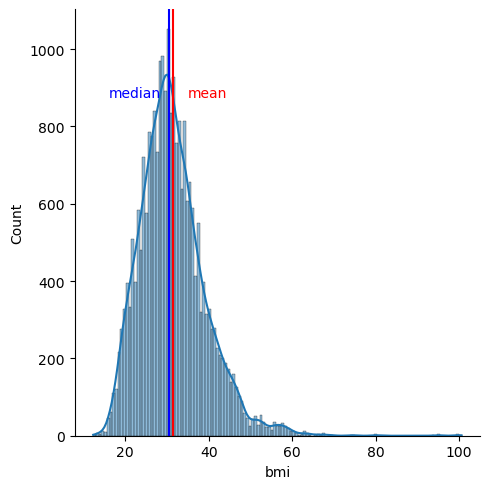

In [5]:
#missing value treatment 
sns.displot(data['bmi'], kde = True)
plt.axvline(data['bmi'].mean(),color = 'red')
plt.axvline(data['bmi'].median(),color = 'blue')
plt.text(16,875,'median', color = 'blue')
plt.text(35,875,'mean', color = 'red')
plt.show()

In [6]:
#misval pada BMI diganti dengan median data
data['bmi'] = data['bmi'].fillna(data['bmi'].median())
print('Data BMI yang null :', data['bmi'].isnull().sum()) #checking
print(data['bmi'])

Data BMI yang null : 0
0        31.2
1        34.2
2        40.4
3        22.9
4        26.5
         ... 
24995    36.1
24996    31.3
24997    30.5
24998    26.6
24999    41.6
Name: bmi, Length: 25000, dtype: float64


In [7]:
#Imputasi pada Year Last Admitted karena missing value mendekati 50%
data=data.drop(['Year_last_admitted'],axis = 1)
data

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,bmi,smoking_status,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,5000,3,1,1,Salried,2,125 to 150,4866,28,1,...,31.2,Unknown,Chennai,67,N,Rare,Moderate,1,25,20978
1,5001,0,0,0,Student,4,150 to 175,6411,50,0,...,34.2,formerly smoked,Jaipur,58,N,Rare,Moderate,3,27,6170
2,5002,1,0,0,Business,4,200 to 225,4509,68,0,...,40.4,formerly smoked,Jaipur,73,N,Daily,Extreme,0,32,28382
3,5003,7,4,0,Business,2,175 to 200,6214,51,0,...,22.9,Unknown,Chennai,71,Y,Rare,No,3,37,27148
4,5004,3,1,0,Student,2,150 to 175,4938,44,0,...,26.5,never smoked,Bangalore,74,N,No,Extreme,0,34,29616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,29995,3,0,0,Salried,4,225 to 250,5614,22,0,...,36.1,smokes,Kanpur,79,Y,Rare,Moderate,4,40,39488
24996,29996,6,0,0,Business,4,200 to 225,4719,58,0,...,31.3,never smoked,Kanpur,66,N,Rare,Moderate,2,28,14808
24997,29997,7,0,1,Student,2,150 to 175,5624,34,0,...,30.5,Unknown,Bhubaneswar,76,N,Rare,Moderate,1,35,33318
24998,29998,1,0,0,Salried,2,225 to 250,10777,27,0,...,26.6,Unknown,Surat,74,N,Rare,Moderate,0,40,30850


# Outlier Treatment

In [8]:
num = data[data.columns[data.dtypes != 'object']]
num

,years_of_insurance_with_us,visited_doctor_last_1_year,daily_avg_steps,age,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,3,2,4866,28,97,31.2,67,1,25,20978
1,0,4,6411,50,212,34.2,58,3,27,6170
2,1,4,4509,68,166,40.4,73,0,32,28382
3,7,2,6214,51,109,22.9,71,3,37,27148
4,3,2,4938,44,118,26.5,74,0,34,29616
...,...,...,...,...,...,...,...,...,...,...
24995,3,4,5614,22,145,36.1,79,4,40,39488
24996,6,4,4719,58,134,31.3,66,2,28,14808
24997,7,2,5624,34,151,30.5,76,1,35,33318
24998,1,2,10777,27,66,26.6,74,0,40,30850


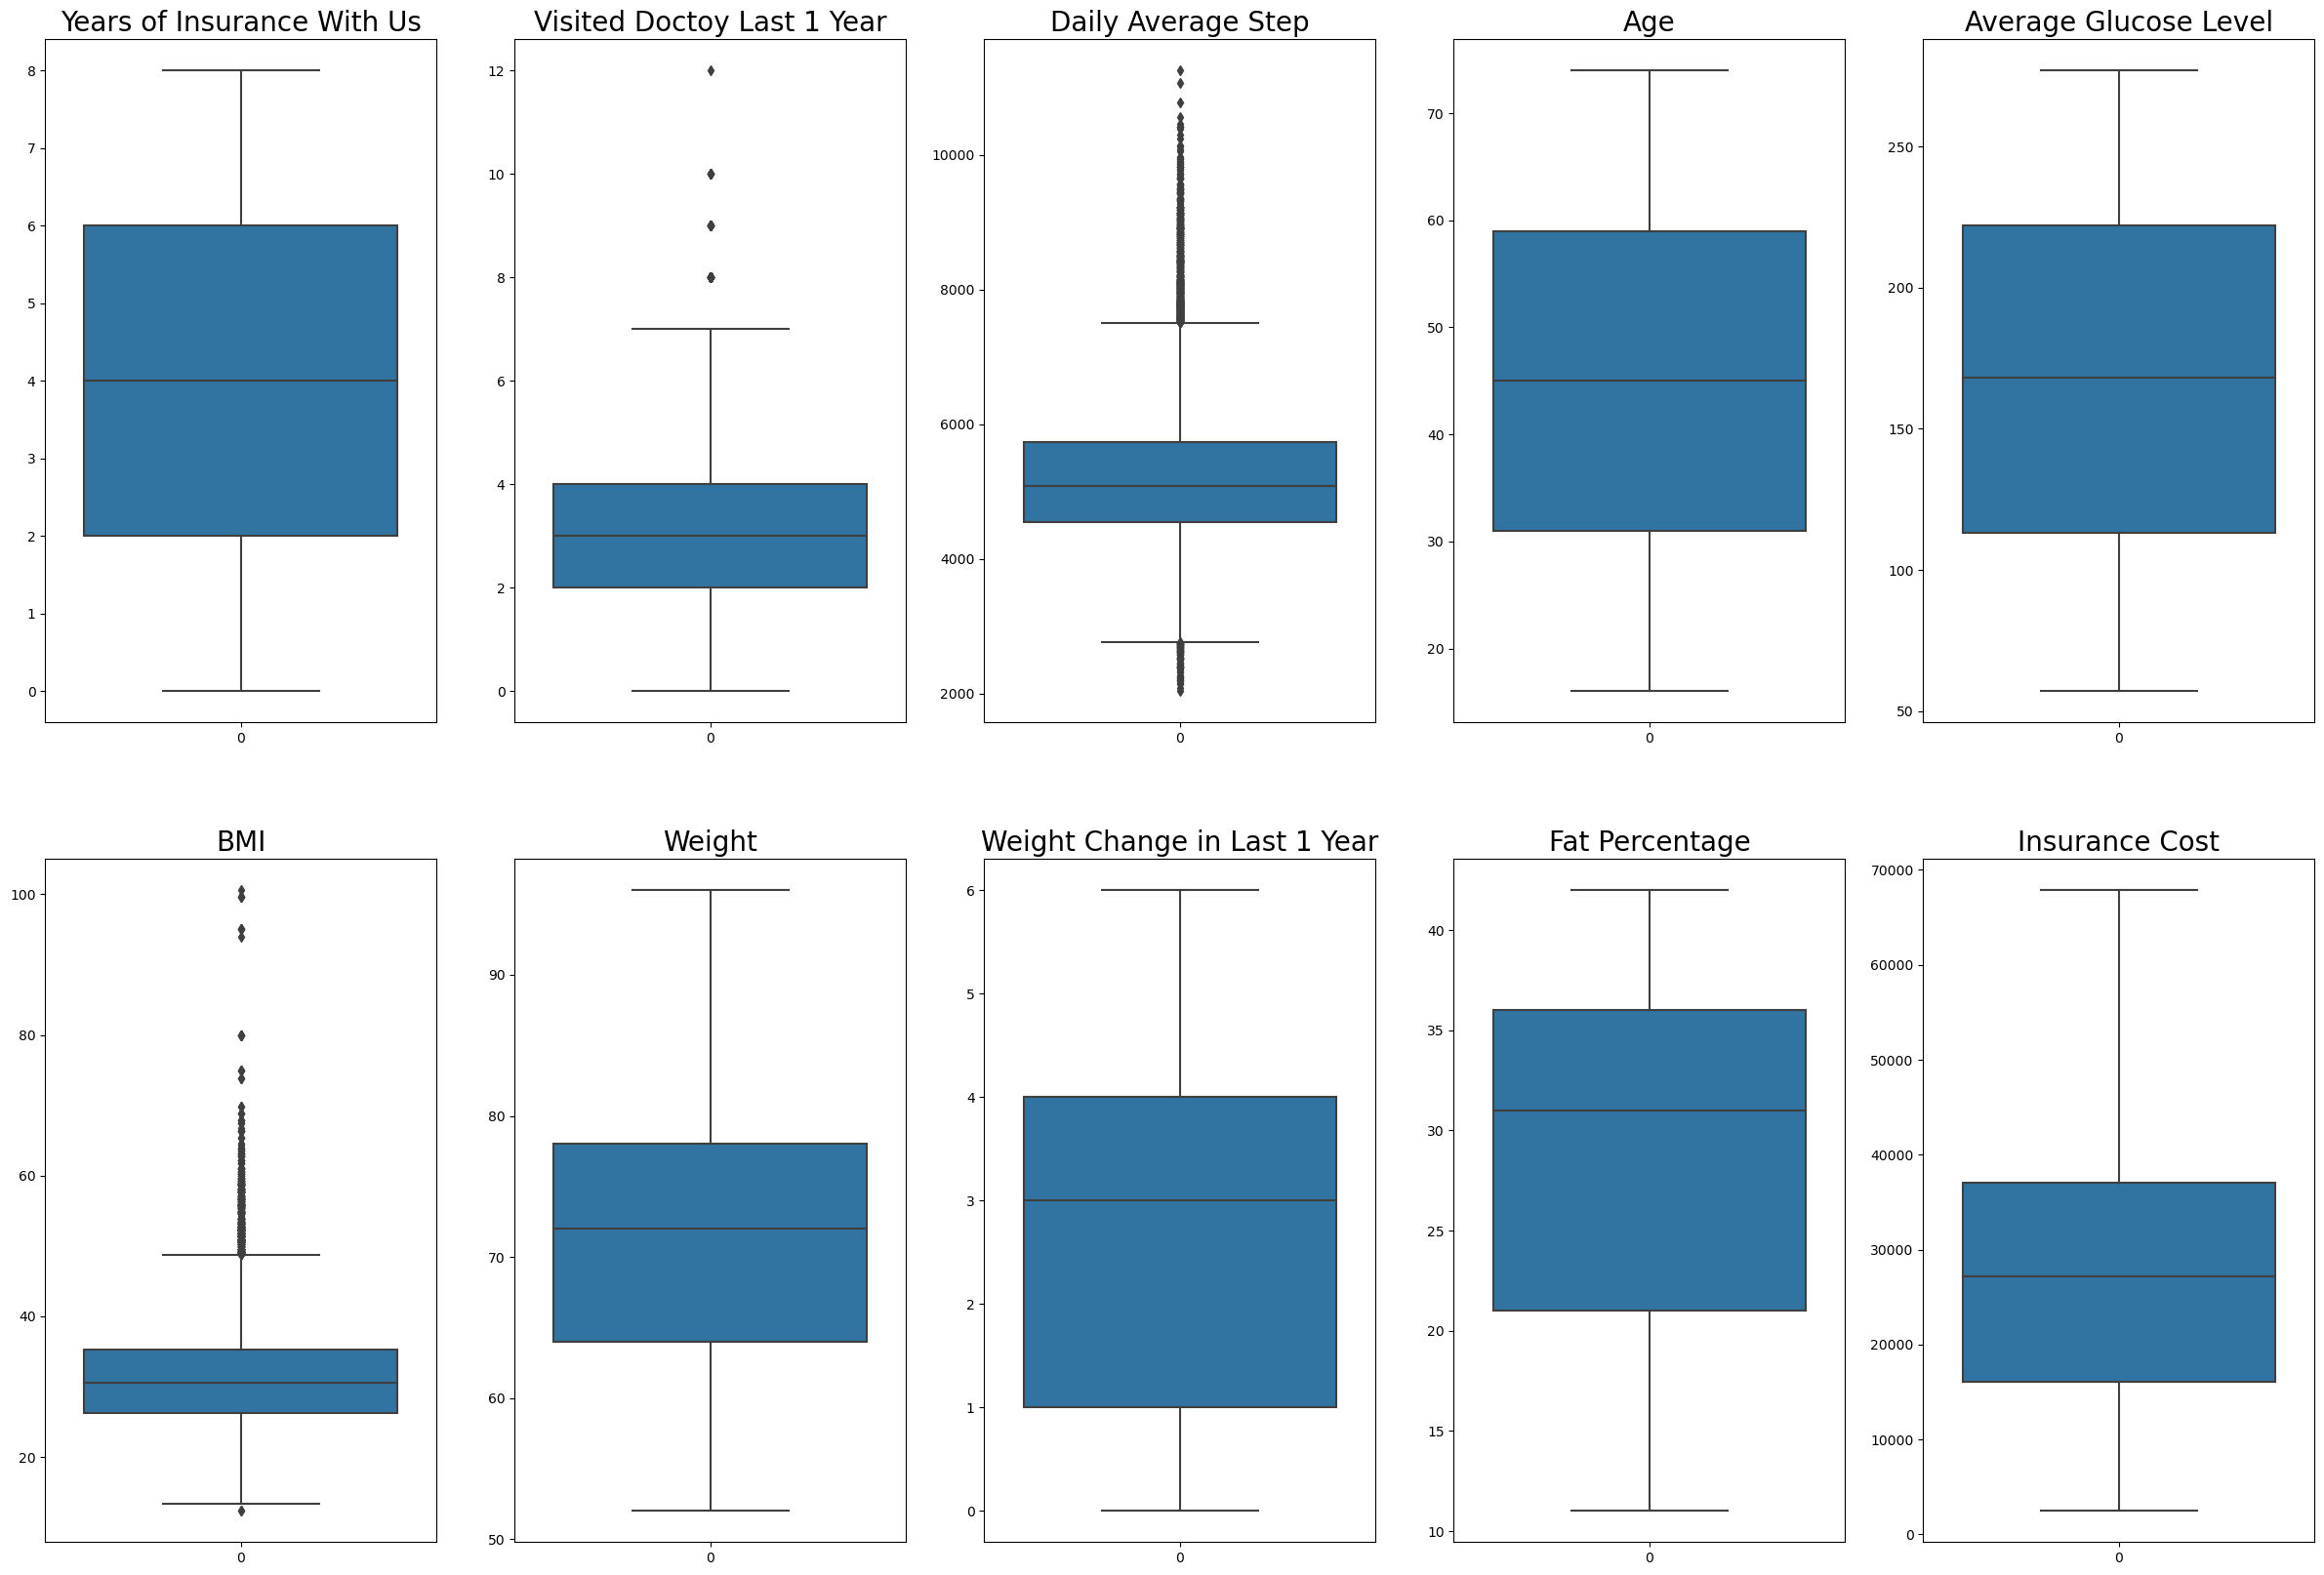

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,20))
sns.boxplot(data = data['years_of_insurance_with_us'], ax = ax[0,0]).set_title("Years of Insurance With Us",fontsize = 20)
sns.boxplot(data = data['visited_doctor_last_1_year'], ax = ax[0,1]).set_title("Visited Doctoy Last 1 Year",fontsize = 20)
sns.boxplot(data = data['daily_avg_steps'], ax = ax[0,2]).set_title("Daily Average Step",fontsize = 20)
sns.boxplot(data = data['age'], ax = ax[0,3]).set_title("Age",fontsize = 20)
sns.boxplot(data = data['avg_glucose_level'], ax = ax[0,4]).set_title("Average Glucose Level",fontsize = 20)
sns.boxplot(data = data['bmi'], ax = ax[1,0]).set_title("BMI",fontsize = 20)
sns.boxplot(data = data['weight'], ax = ax[1,1]).set_title("Weight",fontsize = 20)
sns.boxplot(data = data['weight_change_in_last_one_year'], ax = ax[1,2]).set_title("Weight Change in Last 1 Year",fontsize = 20)
sns.boxplot(data = data['fat_percentage'], ax = ax[1,3]).set_title("Fat Percentage",fontsize = 20)
sns.boxplot(data = data['insurance_cost'], ax = ax[1,4]).set_title("Insurance Cost",fontsize = 20)
plt.show()

In [10]:
Q1 = (data[['visited_doctor_last_1_year','daily_avg_steps','bmi']]).quantile(0.25)
Q3 = (data[['visited_doctor_last_1_year','daily_avg_steps','bmi']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (data> maximum)
lower_than = (data < minimum)
print('\nPersebaran data sebelum ditangani Outlier: ')
print(data[['visited_doctor_last_1_year','daily_avg_steps','bmi']].describe())
data = data.mask(more_than, maximum, axis=1)
data = data.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(data[['visited_doctor_last_1_year','daily_avg_steps','bmi']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
visited_doctor_last_1_year       7.0
daily_avg_steps               7510.5
bmi                             48.8
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
visited_doctor_last_1_year      -1.0
daily_avg_steps               2762.5
bmi                             12.8
dtype: float64

Persebaran data sebelum ditangani Outlier: 
       visited_doctor_last_1_year  daily_avg_steps           bmi
count                25000.000000     25000.000000  25000.000000
mean                     3.104200      5215.889320     31.357952
std                      1.141663      1053.179748      7.720963
min                      0.000000      2034.000000     12.300000
25%                      2.000000      4543.000000     26.300000
50%                      3.000000      5089.000000     30.500000
75%                      4.000000      5730.000000     35.300000
max                     12.000000     11255.000000    100.600000

Persebaran dat

C:\Users\Rania Yunaningrum\AppData\Local\Temp\ipykernel_18296\4031898520.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (data> maximum)
C:\Users\Rania Yunaningrum\AppData\Local\Temp\ipykernel_18296\4031898520.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (data < minimum)


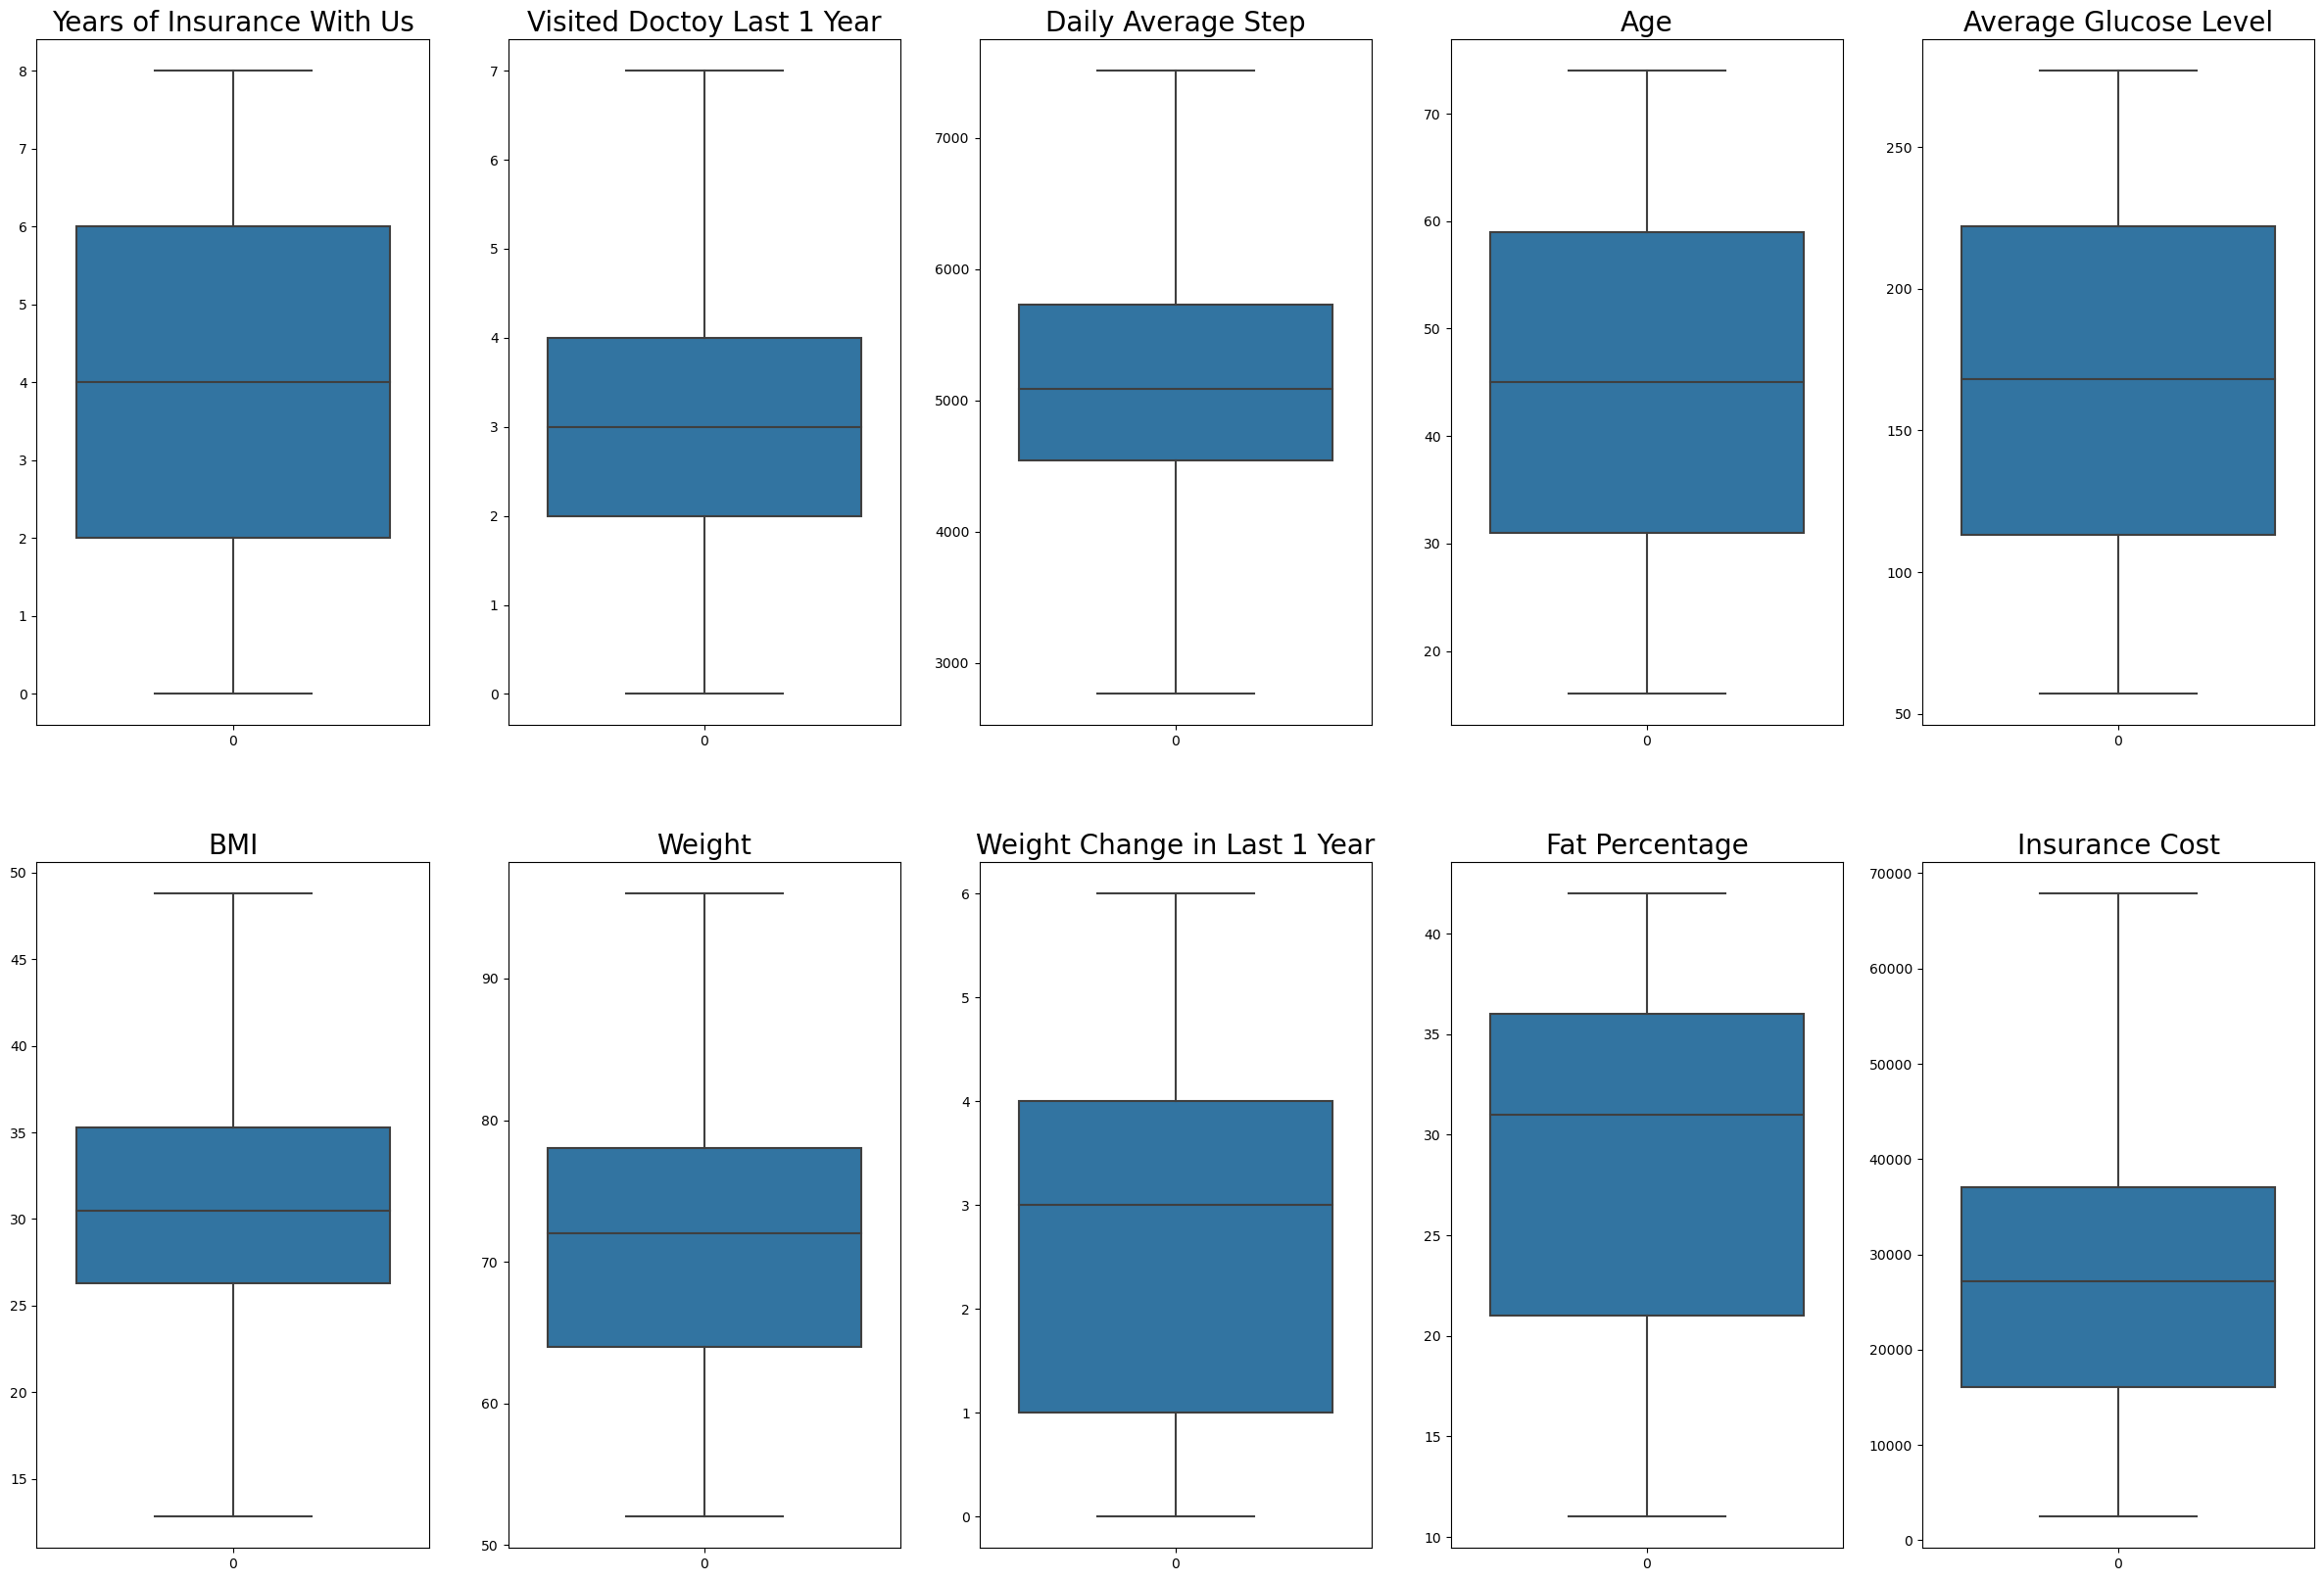

In [11]:
#recheck
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,20))
sns.boxplot(data = data['years_of_insurance_with_us'], ax = ax[0,0]).set_title("Years of Insurance With Us",fontsize = 20)
sns.boxplot(data = data['visited_doctor_last_1_year'], ax = ax[0,1]).set_title("Visited Doctoy Last 1 Year",fontsize = 20)
sns.boxplot(data = data['daily_avg_steps'], ax = ax[0,2]).set_title("Daily Average Step",fontsize = 20)
sns.boxplot(data = data['age'], ax = ax[0,3]).set_title("Age",fontsize = 20)
sns.boxplot(data = data['avg_glucose_level'], ax = ax[0,4]).set_title("Average Glucose Level",fontsize = 20)
sns.boxplot(data = data['bmi'], ax = ax[1,0]).set_title("BMI",fontsize = 20)
sns.boxplot(data = data['weight'], ax = ax[1,1]).set_title("Weight",fontsize = 20)
sns.boxplot(data = data['weight_change_in_last_one_year'], ax = ax[1,2]).set_title("Weight Change in Last 1 Year",fontsize = 20)
sns.boxplot(data = data['fat_percentage'], ax = ax[1,3]).set_title("Fat Percentage",fontsize = 20)
sns.boxplot(data = data['insurance_cost'], ax = ax[1,4]).set_title("Insurance Cost",fontsize = 20)
plt.show()

# Transformasi Data

In [12]:
#transform data function
#minmax
scaler1 = MinMaxScaler()
scaled1 = scaler1.fit_transform(data.select_dtypes([np.number]))
data2 = pd.DataFrame(scaled1)
print(data2)

#Standar scaler
scaler2 = StandardScaler()
scaled2 = scaler2.fit_transform(data.select_dtypes([np.number]))

print(pd.DataFrame(scaled2))

print('\nUkuran Scaled Min Max : ', scaled1.shape)
print('Ukuran Scaled Standarisasi : ', scaled2.shape)
data2.columns = [data[data.columns[data.dtypes != 'object']].columns]
data2

           0         1         2         3         4         5         6  \
0      0.375  0.285714  0.443029  0.206897  0.181818  0.511111  0.340909   
1      0.000  0.571429  0.768429  0.586207  0.704545  0.594444  0.136364   
2      0.125  0.571429  0.367839  0.896552  0.495455  0.766667  0.477273   
3      0.875  0.285714  0.726938  0.603448  0.236364  0.280556  0.431818   
4      0.375  0.285714  0.458193  0.482759  0.277273  0.380556  0.500000   
...      ...       ...       ...       ...       ...       ...       ...   
24995  0.375  0.571429  0.600569  0.103448  0.400000  0.647222  0.613636   
24996  0.750  0.571429  0.412068  0.724138  0.350000  0.513889  0.318182   
24997  0.875  0.285714  0.602675  0.310345  0.427273  0.491667  0.545455   
24998  0.125  0.285714  1.000000  0.189655  0.040909  0.383333  0.500000   
24999  1.000  0.571429  0.657013  0.103448  0.854545  0.800000  0.113636   

              7         8         9  
0      0.166667  0.451613  0.283019  
1      0.50

,years_of_insurance_with_us,visited_doctor_last_1_year,daily_avg_steps,age,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost
0,0.375,0.285714,0.443029,0.206897,0.181818,0.511111,0.340909,0.166667,0.451613,0.283019
1,0.000,0.571429,0.768429,0.586207,0.704545,0.594444,0.136364,0.500000,0.516129,0.056604
2,0.125,0.571429,0.367839,0.896552,0.495455,0.766667,0.477273,0.000000,0.677419,0.396226
3,0.875,0.285714,0.726938,0.603448,0.236364,0.280556,0.431818,0.500000,0.838710,0.377358
4,0.375,0.285714,0.458193,0.482759,0.277273,0.380556,0.500000,0.000000,0.741935,0.415094
...,...,...,...,...,...,...,...,...,...,...
24995,0.375,0.571429,0.600569,0.103448,0.400000,0.647222,0.613636,0.666667,0.935484,0.566038
24996,0.750,0.571429,0.412068,0.724138,0.350000,0.513889,0.318182,0.333333,0.548387,0.188679
24997,0.875,0.285714,0.602675,0.310345,0.427273,0.491667,0.545455,0.166667,0.774194,0.471698
24998,0.125,0.285714,1.000000,0.189655,0.040909,0.383333,0.500000,0.000000,0.935484,0.433962


In [13]:
#transformasi data kategorik
labelencoder = LabelEncoder()
data2['regular_checkup_lasy_year']=labelencoder.fit_transform(data['regular_checkup_lasy_year'])
data2['adventure_sports']=labelencoder.fit_transform(data['adventure_sports'])
data2['Occupation']=labelencoder.fit_transform(data['Occupation'])
data2['cholesterol_level']=labelencoder.fit_transform(data['cholesterol_level'])
data2['heart_decs_history']=labelencoder.fit_transform(data['heart_decs_history'])
data2['other_major_decs_history']=labelencoder.fit_transform(data['other_major_decs_history'])
data2['Gender']=labelencoder.fit_transform(data['Gender'])
data2['smoking_status']=labelencoder.fit_transform(data['smoking_status'])
data2['Location']=labelencoder.fit_transform(data['Location'])
data2['covered_by_any_other_company']=labelencoder.fit_transform(data['covered_by_any_other_company'])
data2['Alcohol']=labelencoder.fit_transform(data['Alcohol'])
data2['exercise']=labelencoder.fit_transform(data['exercise'])
data2

,years_of_insurance_with_us,visited_doctor_last_1_year,daily_avg_steps,age,avg_glucose_level,bmi,weight,weight_change_in_last_one_year,fat_percentage,insurance_cost,...,Occupation,cholesterol_level,heart_decs_history,other_major_decs_history,Gender,smoking_status,Location,covered_by_any_other_company,Alcohol,exercise
0,0.375,0.285714,0.443029,0.206897,0.181818,0.511111,0.340909,0.166667,0.451613,0.283019,...,1,0,1,0,1,0,3,0,2,1
1,0.000,0.571429,0.768429,0.586207,0.704545,0.594444,0.136364,0.500000,0.516129,0.056604,...,2,1,0,0,1,1,6,0,2,1
2,0.125,0.571429,0.367839,0.896552,0.495455,0.766667,0.477273,0.000000,0.677419,0.396226,...,0,3,0,0,0,1,6,0,0,0
3,0.875,0.285714,0.726938,0.603448,0.236364,0.280556,0.431818,0.500000,0.838710,0.377358,...,0,2,0,0,0,0,3,1,2,2
4,0.375,0.285714,0.458193,0.482759,0.277273,0.380556,0.500000,0.000000,0.741935,0.415094,...,2,1,0,1,1,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.375,0.571429,0.600569,0.103448,0.400000,0.647222,0.613636,0.666667,0.935484,0.566038,...,1,4,0,0,1,3,7,1,2,1
24996,0.750,0.571429,0.412068,0.724138,0.350000,0.513889,0.318182,0.333333,0.548387,0.188679,...,0,3,0,0,1,2,7,0,2,1
24997,0.875,0.285714,0.602675,0.310345,0.427273,0.491667,0.545455,0.166667,0.774194,0.471698,...,2,1,0,1,1,0,2,0,2,1
24998,0.125,0.285714,1.000000,0.189655,0.040909,0.383333,0.500000,0.000000,0.935484,0.433962,...,1,4,0,0,1,0,14,0,2,1


# Discreatization

In [14]:
data['bmi_binned']=pd.cut(x=data['bmi'],bins=[0,18,25,30,45,100])
data['bmi_category']=pd.cut(x=data['bmi'],bins=[0,18,25,30,45,100],
                          labels=['Underweight','Normal','Overweight','Obese','Severly Obese'])
data.head()

,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,Location,weight,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost,bmi_binned,bmi_category
0,5000,3,1,1,Salried,2,125 to 150,4866.0,28,1,...,Chennai,67,N,Rare,Moderate,1,25,20978,"(30, 45]",Obese
1,5001,0,0,0,Student,4,150 to 175,6411.0,50,0,...,Jaipur,58,N,Rare,Moderate,3,27,6170,"(30, 45]",Obese
2,5002,1,0,0,Business,4,200 to 225,4509.0,68,0,...,Jaipur,73,N,Daily,Extreme,0,32,28382,"(30, 45]",Obese
3,5003,7,4,0,Business,2,175 to 200,6214.0,51,0,...,Chennai,71,Y,Rare,No,3,37,27148,"(18, 25]",Normal
4,5004,3,1,0,Student,2,150 to 175,4938.0,44,0,...,Bangalore,74,N,No,Extreme,0,34,29616,"(25, 30]",Overweight


In [15]:
print(data['insurance_cost'].describe())
data['insurance_cost_binned']=pd.cut(x=data['insurance_cost'],bins=[0,16042,27148,37020,1000000000000])
data['insurance_cost_category']=pd.cut(x=data['insurance_cost'],bins=[0,16042,27148,37020,1000000000000],
                          labels=['Basic','Medium','Normal','Premium'])
data.head()

count    25000.000000
mean     27147.407680
std      14323.691832
min       2468.000000
25%      16042.000000
50%      27148.000000
75%      37020.000000
max      67870.000000
Name: insurance_cost, dtype: float64


,applicant_id,years_of_insurance_with_us,regular_checkup_lasy_year,adventure_sports,Occupation,visited_doctor_last_1_year,cholesterol_level,daily_avg_steps,age,heart_decs_history,...,covered_by_any_other_company,Alcohol,exercise,weight_change_in_last_one_year,fat_percentage,insurance_cost,bmi_binned,bmi_category,insurance_cost_binned,insurance_cost_category
0,5000,3,1,1,Salried,2,125 to 150,4866.0,28,1,...,N,Rare,Moderate,1,25,20978,"(30, 45]",Obese,"(16042, 27148]",Medium
1,5001,0,0,0,Student,4,150 to 175,6411.0,50,0,...,N,Rare,Moderate,3,27,6170,"(30, 45]",Obese,"(0, 16042]",Basic
2,5002,1,0,0,Business,4,200 to 225,4509.0,68,0,...,N,Daily,Extreme,0,32,28382,"(30, 45]",Obese,"(27148, 37020]",Normal
3,5003,7,4,0,Business,2,175 to 200,6214.0,51,0,...,Y,Rare,No,3,37,27148,"(18, 25]",Normal,"(16042, 27148]",Medium
4,5004,3,1,0,Student,2,150 to 175,4938.0,44,0,...,N,No,Extreme,0,34,29616,"(25, 30]",Overweight,"(27148, 37020]",Normal


# Feature Selection

In [16]:
print(data2.dtypes)

years_of_insurance_with_us        float64
visited_doctor_last_1_year        float64
daily_avg_steps                   float64
age                               float64
avg_glucose_level                 float64
bmi                               float64
weight                            float64
weight_change_in_last_one_year    float64
fat_percentage                    float64
insurance_cost                    float64
regular_checkup_lasy_year           int32
adventure_sports                    int32
Occupation                          int32
cholesterol_level                   int32
heart_decs_history                  int32
other_major_decs_history            int32
Gender                              int32
smoking_status                      int32
Location                            int32
covered_by_any_other_company        int32
Alcohol                             int32
exercise                            int32
dtype: object


In [17]:
data2 = data2.astype({"regular_checkup_lasy_year":'str', "adventure_sports":'str','Occupation' : 'str',
                    "cholesterol_level":'str',"heart_decs_history":'str',"other_major_decs_history":'str',
                    "Gender":'str',"smoking_status":'str',"Location":'str',
                    "covered_by_any_other_company":'str',"Alcohol":'str',"exercise":'str'})
print(data2.dtypes)

years_of_insurance_with_us        float64
visited_doctor_last_1_year        float64
daily_avg_steps                   float64
age                               float64
avg_glucose_level                 float64
bmi                               float64
weight                            float64
weight_change_in_last_one_year    float64
fat_percentage                    float64
insurance_cost                    float64
regular_checkup_lasy_year           int32
adventure_sports                    int32
Occupation                          int32
cholesterol_level                   int32
heart_decs_history                  int32
other_major_decs_history            int32
Gender                              int32
smoking_status                      int32
Location                            int32
covered_by_any_other_company        int32
Alcohol                             int32
exercise                            int32
dtype: object


In [18]:
#Filter

#categoric-categoric
X = data2[['adventure_sports','Gender','smoking_status','Alcohol','exercise']]
X = pd.get_dummies(X)
y = data2['cholesterol_level']
y = pd.get_dummies(y)

#feature selection using chi2
bestfeatures = SelectKBest(score_func = chi2, k = 5)
fit = bestfeatures.fit(X,y)

#creat df for scores
dfscores = pd.DataFrame(fit.scores_)
#creat df for column names
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframe for better visualization
featureScores = pd.concat([dfcolumns,dfscores], axis = 1)
#naming the dataframe columns
featureScores.columns = ['Selected_colums','Score_chi2']
#print 5 best features
print(featureScores.nlargest(5,'Score_chi2'))

       Selected_colums  Score_chi2
3           (Alcohol,)  151.880198
4          (exercise,)   10.549036
0  (adventure_sports,)    5.073899
2    (smoking_status,)    2.690836
1            (Gender,)    1.552954


C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


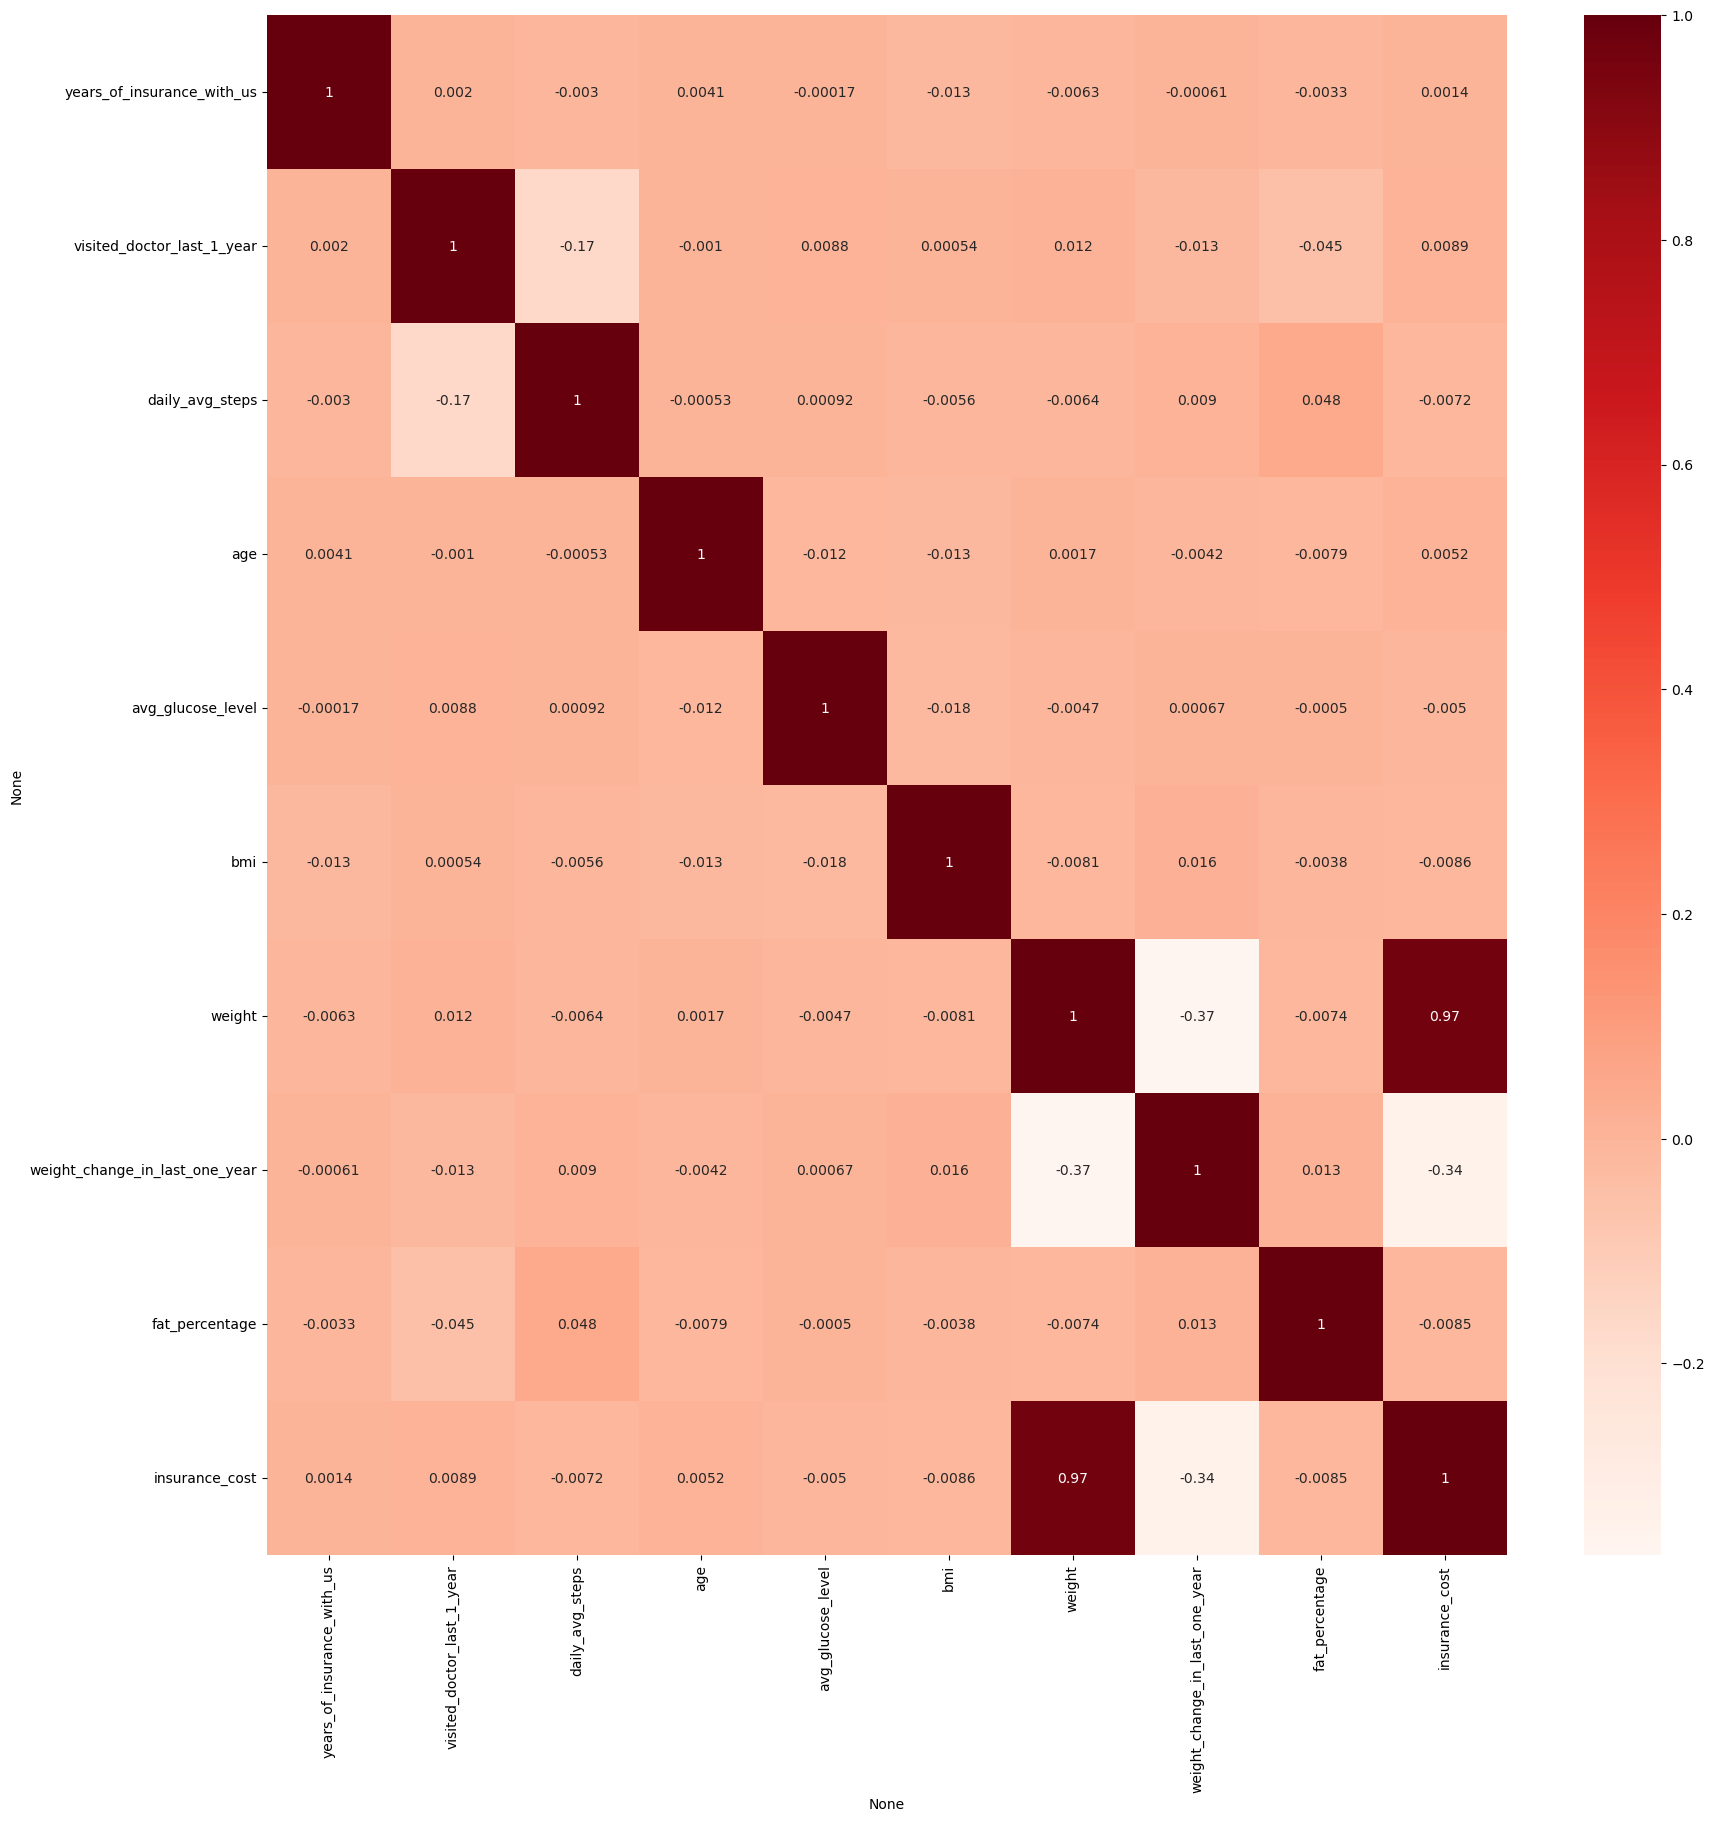

                               insurance_cost
years_of_insurance_with_us                NaN
visited_doctor_last_1_year                NaN
daily_avg_steps                           NaN
age                                       NaN
avg_glucose_level                         NaN
bmi                                       NaN
weight                               0.970357
weight_change_in_last_one_year            NaN
fat_percentage                            NaN
insurance_cost                       1.000000


In [19]:
#numeric-numeric
#pearson
plt.figure(figsize = (20,20))
cor = data2.iloc[:,0:10].corr(method = 'pearson')
sns.heatmap(cor,annot=True, cmap = plt.cm.Reds)
plt.show()

pd.DataFrame(cor)
#Correlation with output variabel
cor_target = abs(cor['insurance_cost'])

#selecting highly correlated featires
relevant_features = cor_target[cor_target>0.7]
print(relevant_features)

In [20]:
##### numeric-categoric
#feature selection using anova
X = data2[['age','avg_glucose_level','bmi','weight','fat_percentage',]] #numeric
y = data['insurance_cost_category'] #categoric
fs = SelectKBest(score_func = f_classif, k = 5)
fit = fs.fit(X,y)

#creat df for scores
datascores = pd.DataFrame(fit.scores_)
#creat df for column names
datacolumns = pd.DataFrame(data2.columns)

#concat two dataframe for better visualization
featureScores = pd.concat([datacolumns,datascores], axis = 1)
#naming the dataframe columns
featureScores.columns = ['Selected_colums','Score_ANOVA']
#print 5 best features
print(featureScores.nlargest(5,'Score_ANOVA'))

                 Selected_colums   Score_ANOVA
3                         (age,)  47795.332641
0  (years_of_insurance_with_us,)      1.852187
4           (avg_glucose_level,)      1.004552
1  (visited_doctor_last_1_year,)      0.755812
2             (daily_avg_steps,)      0.368440


C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [21]:
#categoric-numeric
#feature selection using anova
X = data2.iloc[:,10:21] #categoric
y = data2['insurance_cost'] #numeric
fs = SelectKBest(score_func = f_classif, k = 5)
fit = fs.fit(X,y)

#creat df for scores
datascores = pd.DataFrame(fit.scores_)
#creat df for column names
datacolumns = pd.DataFrame(data2.columns)

#concat two dataframe for better visualization
featureScores = pd.concat([datacolumns,datascores], axis = 1)
#naming the dataframe columns
featureScores.columns = ['Selected_colums','Score_ANOVA']
#print 5 best features
print(featureScores.nlargest(5,'Score_ANOVA'))

                     Selected_colums  Score_ANOVA
0      (years_of_insurance_with_us,)    19.415697
9                  (insurance_cost,)    13.900128
1      (visited_doctor_last_1_year,)     4.732699
7  (weight_change_in_last_one_year,)     1.273640
4               (avg_glucose_level,)     1.265281


C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
#wrapped
##backward

X = data2[['daily_avg_steps','age','avg_glucose_level','bmi','weight',
           'smoking_status','fat_percentage','Occupation',
           'Alcohol','exercise']]
y = data2['cholesterol_level']

model = LogisticRegression(random_state = 123456789)
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X,y)
print('Num Features : %s' %(fit.n_features_))
print('Selected features : %s' %(fit.support_))
print('Feature Ranking : %s' %(fit.ranking_))
feature_names = np.array(X.columns)
print('Most important features (RFE) : %s'%feature_names[rfe.support_])

C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logi

Num Features : 5
Selected features : [ True False False False  True False  True  True  True False]
Feature Ranking : [1 5 3 2 1 6 1 1 1 4]
Most important features (RFE) : [('daily_avg_steps',) ('weight',) ('fat_percentage',) ('Occupation',)
 ('Alcohol',)]


C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
sfs = SFS(LinearRegression(),
         k_features = 4, #banyak fitur yang dipilih
         forward = True, #jika bacward false
         scoring = 'r2', #untuk regresi, kalo classifi (acc, precision, recall,f1)
         cv = 0) #k-fold cross validation
sfs.fit(X,y)
a = sfs.k_feature_names_
a

(('daily_avg_steps',), ('fat_percentage',), ('Occupation',), ('Alcohol',))

C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


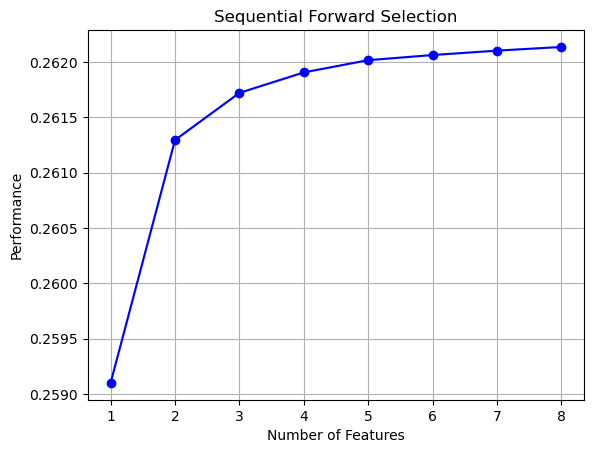

In [24]:
sfs1 = SFS(LinearRegression(),
          k_features = (8),
          forward = True,
          floating = False,
          #true-false -> forward
          #false-false -> backward
          #false-true -> stepwise
          cv = 0)
sfs1.fit(X,y)
fig1 = plot_sfs(sfs1.get_metric_dict(),kind='std_dev')
plt.title('Sequential Forward Selection')
plt.grid()
plt.show()


# Embedded Lasso

In [25]:
target = data['insurance_cost']
features = data[['years_of_insurance_with_us','visited_doctor_last_1_year',
                 'daily_avg_steps','age','avg_glucose_level']]
features
lasso = Lasso()
lasso.fit(features,target)

Lasso()

In [26]:
lasso=Lasso(5)
lasso.fit(features,target)
print(lasso.fit(features,target))
lasso_coef = pd.DataFrame({'Feature' : features.columns,'LassoCoef' : lasso.coef_}).sort_values(by = 'LassoCoef',ascending = False)
print(lasso_coef)
lasso_coef['LassoCoef'] = abs(lasso_coef['LassoCoef'])
lasso_coef.sort_values(by='LassoCoef',ascending = False)

Lasso(alpha=5)
                      Feature  LassoCoef
1  visited_doctor_last_1_year  97.843193
0  years_of_insurance_with_us   6.675462
3                         age   4.549145
2             daily_avg_steps  -0.087815
4           avg_glucose_level  -1.142588


,Feature,LassoCoef
1,visited_doctor_last_1_year,97.843193
0,years_of_insurance_with_us,6.675462
3,age,4.549145
4,avg_glucose_level,1.142588
2,daily_avg_steps,0.087815


In [27]:
lasso_df = lasso_coef.sort_values(by='LassoCoef', ascending=False).head(3)
lasso_df = pd.DataFrame({'Lasso Methode' : lasso_df['Feature'].values})
lasso_df

,Lasso Methode
0,visited_doctor_last_1_year
1,years_of_insurance_with_us
2,age


# PCA

In [32]:
features = ['years_of_insurance_with_us','visited_doctor_last_1_year',
                 'daily_avg_steps','age','avg_glucose_level']
x = data.loc[:,features].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDF = pd.DataFrame(data =  principalComponents, columns = ['principal component 1','principal component 2'])
finalDf = pd.concat([principalDF,data['covered_by_any_other_company']],axis = 1)
finalDf.head(5)

C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


,principal component 1,principal component 2,covered_by_any_other_company
0,-1.369981,-0.117933,N
1,-0.348892,-1.079509,N
2,-0.402046,1.267362,N
3,-1.396164,0.830963,Y
4,0.627354,-0.840951,N


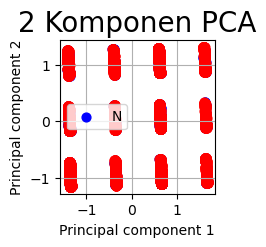

[0.36019197 0.25615787]


In [36]:
fig = plt.figure(figsize = (2,2))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal component 1')
ax.set_ylabel('Principal component 2')
ax.set_title('2 Komponen PCA', fontsize = 20)
covered_by_any_other_company = ['Y', 'N']
colors = ['blue', 'red']
finalDf = pd.concat([principalDF,data['covered_by_any_other_company']],axis = 1)
for covered_by_any_other_company, color in zip(covered_by_any_other_company,colors):
 indicesToKeep = finalDf['covered_by_any_other_company'] == covered_by_any_other_company
 ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1'],
 finalDf.loc[indicesToKeep, 'principal component 2'],
 c = color,
 s = 40)
ax.legend(covered_by_any_other_company)
ax.grid()
plt.show()
print(pca.explained_variance_ratio_)